In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
series = np.sin(0.1 * np.arange(0, 200)) + np.random.randn(200) * 0.1
series

array([ 0.04395997,  0.1042858 ,  0.02104239,  0.03771786,  0.34950546,
        0.30311034,  0.47896497,  0.63508734,  0.74550725,  0.82608991,
        0.78599072,  0.92153095,  0.93796063,  1.01285704,  0.81860392,
        1.05740368,  1.13642602,  0.83138118,  1.15473842,  0.96931326,
        0.93407014,  1.04485377,  0.79689687,  0.68279379,  0.77960204,
        0.52769624,  0.71497788,  0.4833093 ,  0.56440778,  0.30929011,
        0.04344813, -0.07382269,  0.18567008, -0.20658238, -0.28773588,
       -0.44208128, -0.43155549, -0.47577882, -0.68128689, -0.7747786 ,
       -0.73262444, -0.72793325, -0.85023525, -0.82391641, -0.95351665,
       -1.05278167, -1.0148195 , -1.05667124, -1.02554539, -0.91081627,
       -1.10697549, -0.91383901, -0.8165197 , -0.9042071 , -0.60944214,
       -0.73403503, -0.66028415, -0.68884086, -0.48871428, -0.36833986,
       -0.31212759, -0.18960012, -0.13810717, -0.04508136, -0.09265907,
        0.25138691,  0.2684092 ,  0.42424591,  0.48784541,  0.43

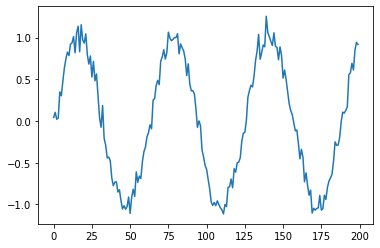

In [4]:
plt.plot(series)
plt.show()

In [5]:
### build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [6]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 15ms/sample - loss: 0.4989 - val_loss: 0.1374
Epoch 2/80
95/95 [==============================] - 0s 356us/sample - loss: 0.1823 - val_loss: 0.0919
Epoch 3/80
95/95 [==============================] - 0s 365us/sample - loss: 0.1293 - val_loss: 0.0879
Epoch 4/80
95/95 [==============================] - 0s 371us/sample - loss: 0.0881 - val_loss: 0.0514
Epoch 5/80
95/95 [==============================] - 0s 353us/sample - loss: 0.0687 - val_loss: 0.0403
Epoch 6/80
95/95 [==============================] - 0s 353us/sample - loss: 0.0405 - val_loss: 0.0228
Epoch 7/80
95/95 [==============================] - 0s 334us/sample - loss: 0.0344 - val_loss: 0.0302
Epoch 8/80
95/95 [==============================] - 0s 389us/sample - loss: 0.0370 - val_loss: 0.0358
Epoch 9/80
95/95 [==============================] - 0s 345us/sample - loss: 0.0388 - val_loss: 0.0311
Epoch 10/80
95/95 [====================

95/95 [==============================] - 0s 330us/sample - loss: 0.0160 - val_loss: 0.0151


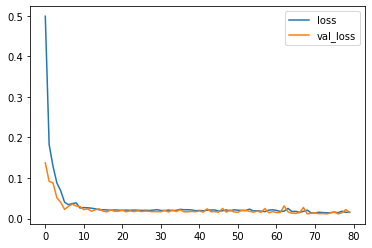

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [8]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

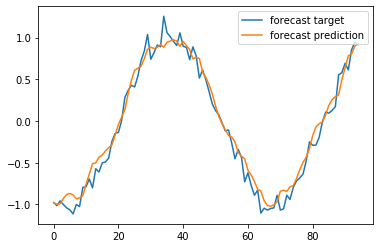

In [9]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()